In [1]:
# ==== Core ====
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import re
# ==== Viz ====
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from IPython.display import display

# ==== Stats / Transforms ====
from scipy.special import boxcox1p
from mplfinance.original_flavor import candlestick_ohlc

# ==== Scikit-learn ====
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder, LabelEncoder,
    StandardScaler, MinMaxScaler, RobustScaler
)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
import lightgbm as lgb
from lightgbm import LGBMRegressor
from scipy import stats
from itertools import combinations
from statsmodels.stats.multitest import multipletests
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import BallTree
from sklearn.neighbors import NearestNeighbors
import optuna
import pickle
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import BallTree
from pathlib import Path
from typing import Optional
import re, csv, os, json, warnings
import shap


In [2]:
# 한글 깨짐 방지
import matplotlib
matplotlib.rc('font', family='NanumGothic')  # 또는 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

In [21]:
# 시드 고정

import random
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [4]:
# 주소지정
os.chdir(r'/workspace/project/upstage-ml-regression-sigma7/data')

In [39]:
# 데이터 불러오기
train_file = r'train.csv'
test_file = r'test.csv'
bus_file = r'bus_feature.csv'
subway_file = r'subway_feature.csv'
train = pd.read_csv(train_file, encoding= 'utf-8')
test = pd.read_csv(test_file, encoding= 'utf-8')
bus = pd.read_csv(bus_file, encoding= 'utf-8')
subway = pd.read_csv(subway_file, encoding= 'utf-8')


In [40]:
volume_file = r'거래량.csv'
cpi_file = r'소비자물가지수_총_CPI.csv'
gdp_file = r'GDP.csv'
interest_rate_file = r'한국은행_금리.csv'
monthly_cpi_file = r'CPI_전월비_전월동월비.csv'

volume = pd.read_csv(volume_file, encoding= 'utf-8')
cpi = pd.read_csv(cpi_file, encoding= 'utf-8')
gdp = pd.read_csv(gdp_file, encoding= 'utf-8')
interest_rate = pd.read_csv(interest_rate_file, encoding= 'utf-8')
monthly_cpi = pd.read_csv(monthly_cpi_file, encoding= 'utf-8')


In [34]:
# 데이터 확
print('train 데이터입니다.')
train

train 데이터입니다.


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,91500
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,130000
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,117000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000


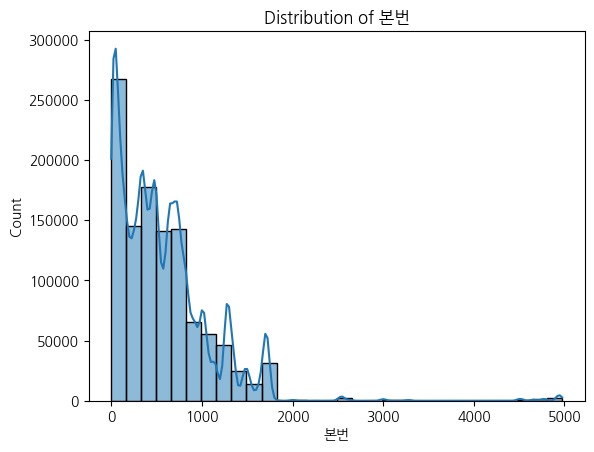

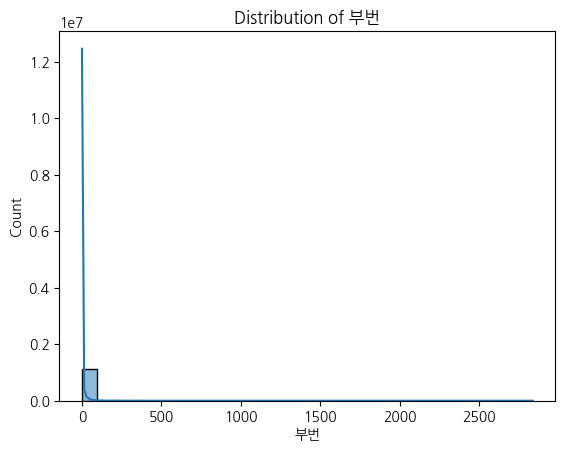

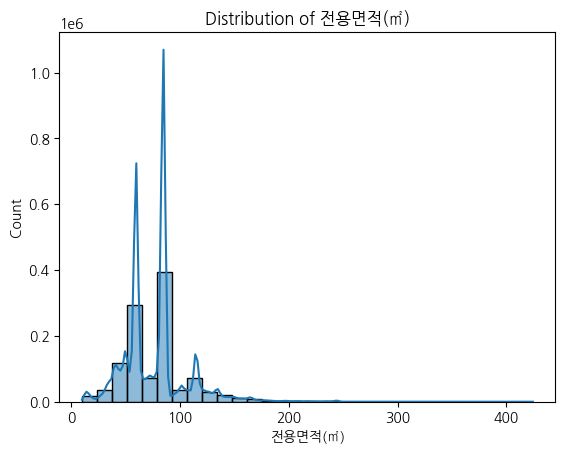

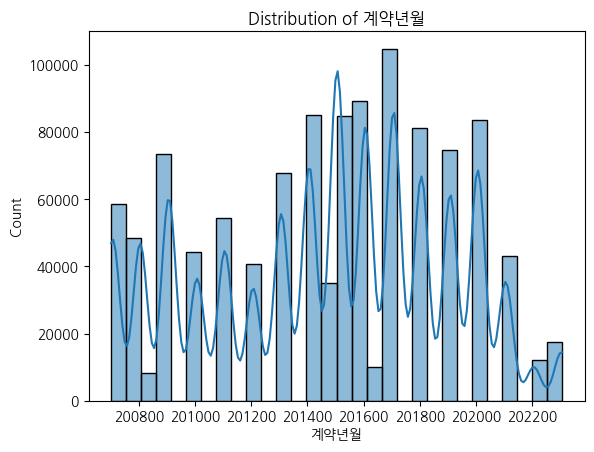

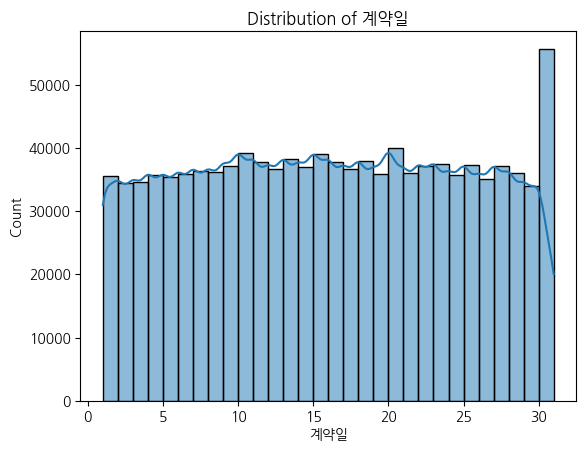

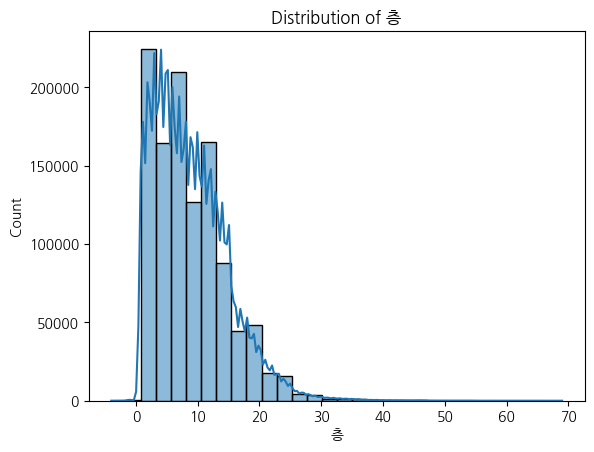

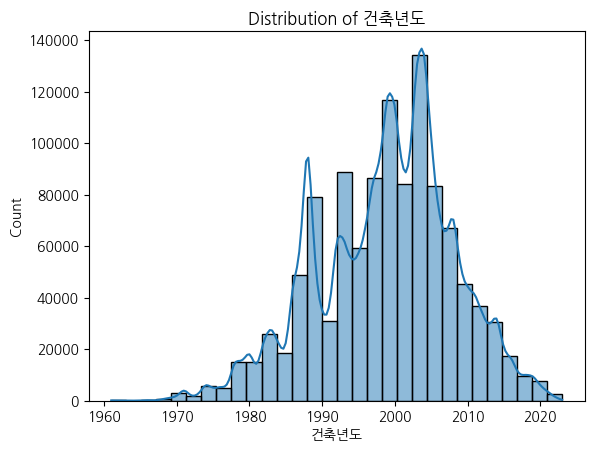

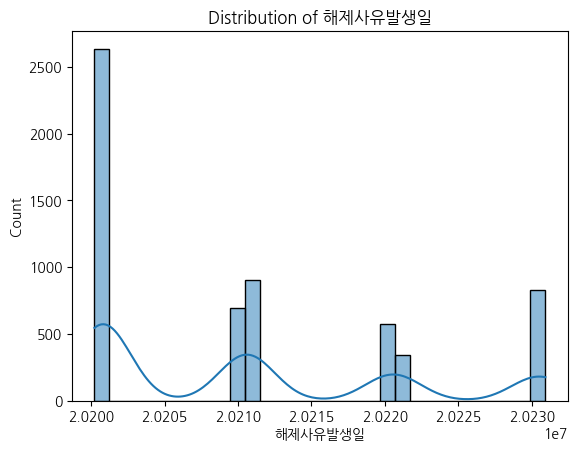

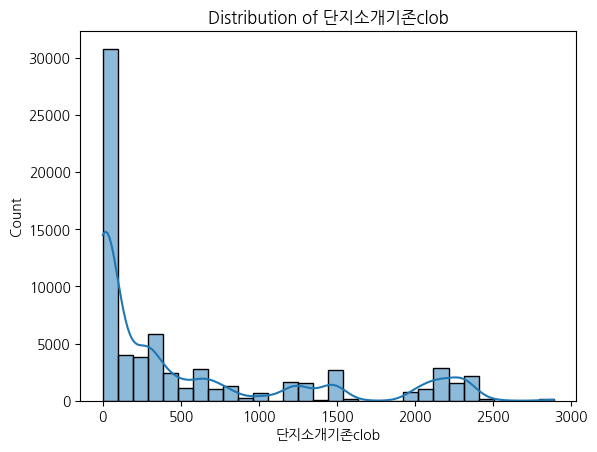

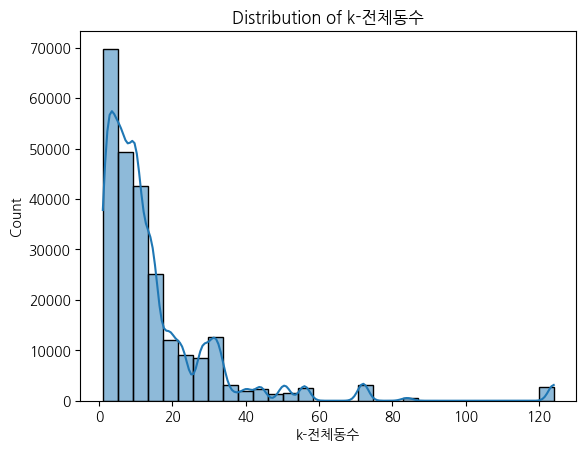

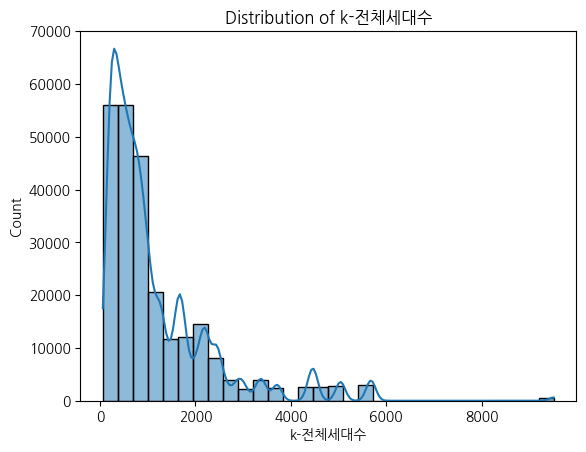

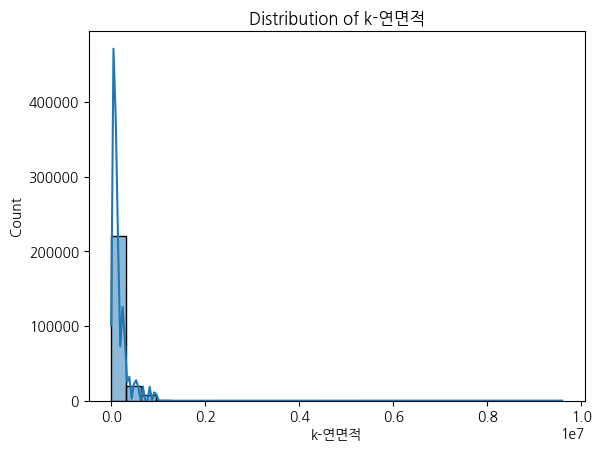

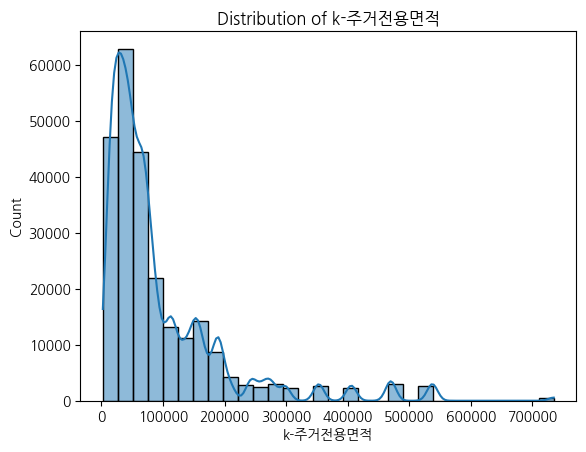

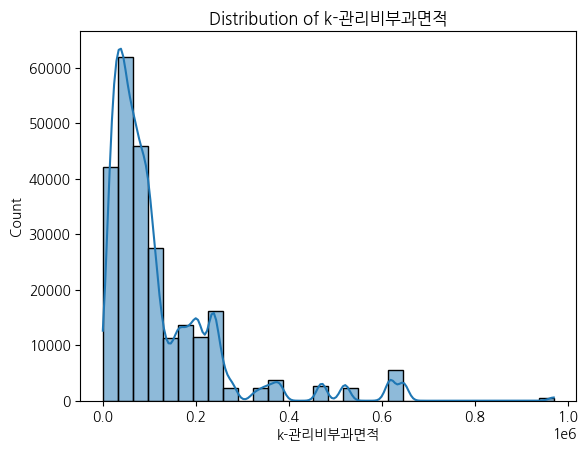

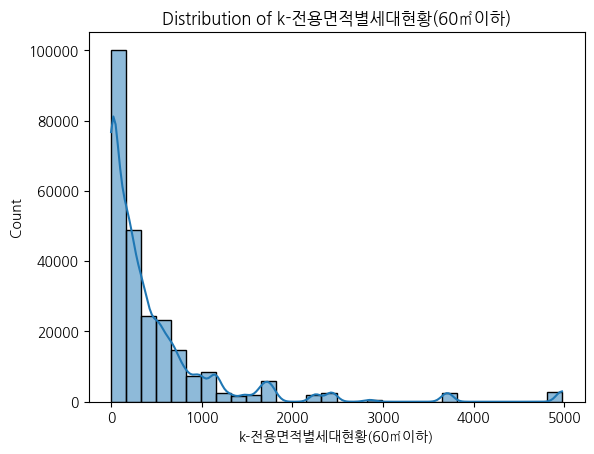

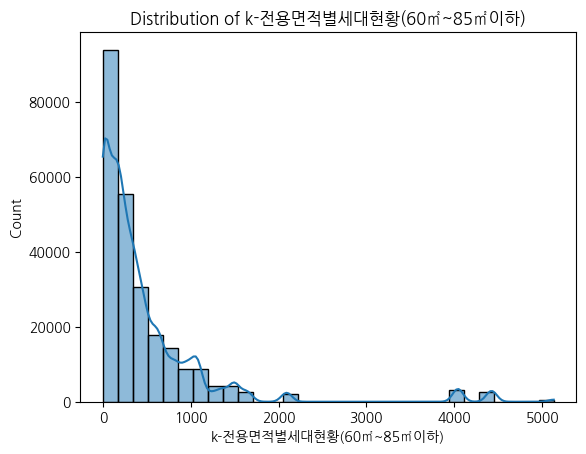

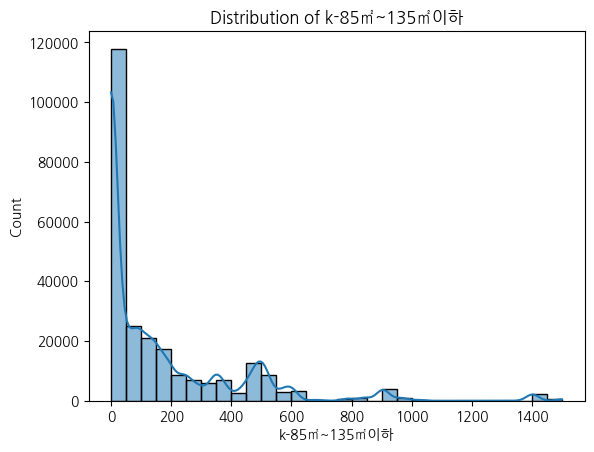

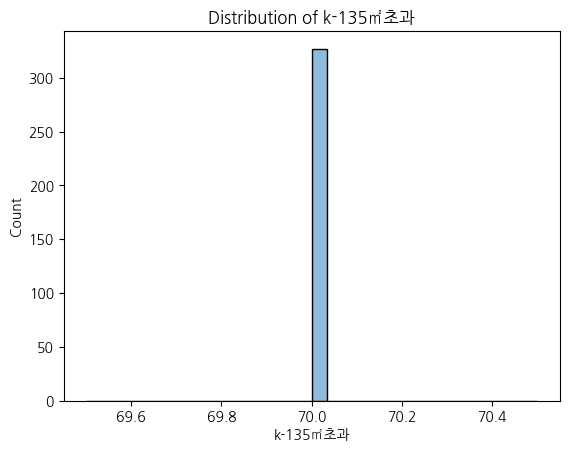

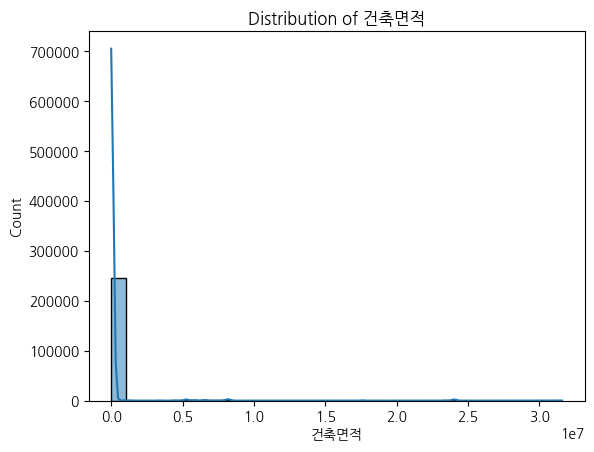

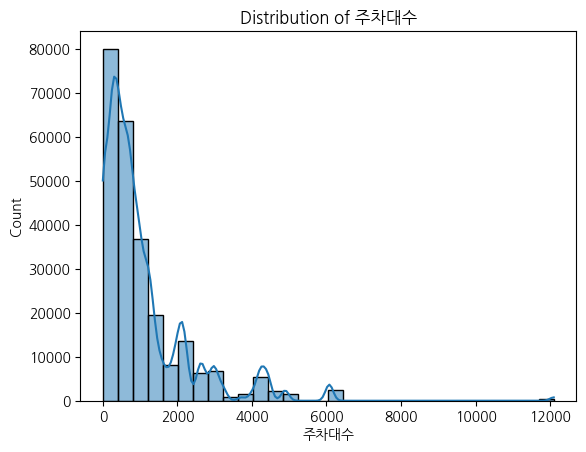

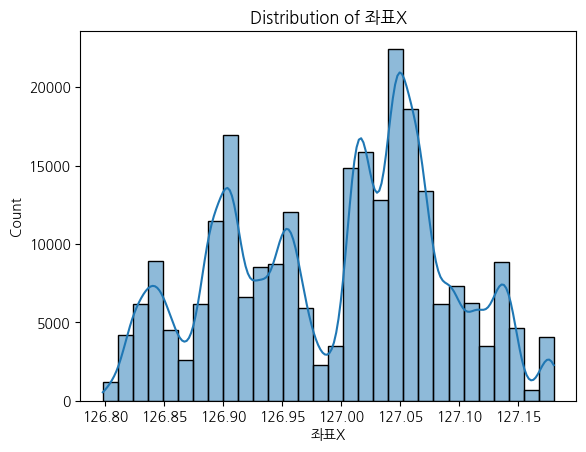

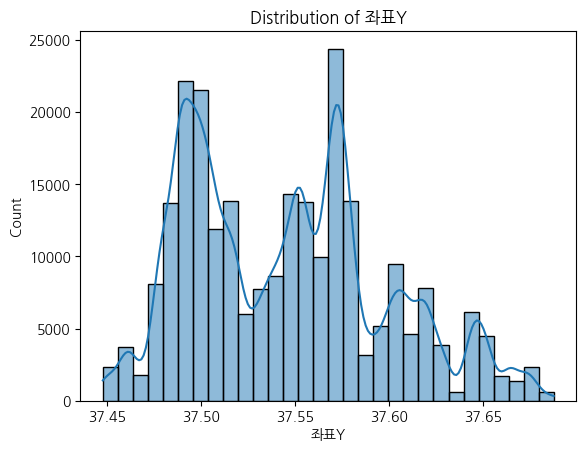

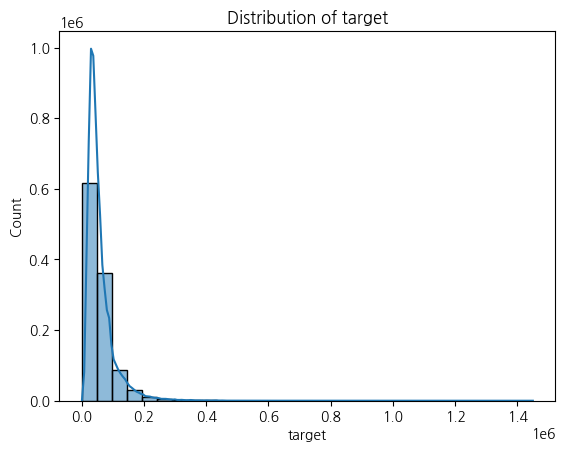

In [7]:
# feature 분포 확인
numeric_cols = train.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    sns.histplot(data=train, x=col, bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [8]:
# 수치형 변수, 범주형 변수 확인
continuous_columns = []
categorical_columns = []

for column in train.columns:
    if pd.api.types.is_numeric_dtype(train[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("연속형 변수:", continuous_columns)
print("범주형 변수:", categorical_columns)

연속형 변수: ['본번', '부번', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도', '해제사유발생일', '단지소개기존clob', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '건축면적', '주차대수', '좌표X', '좌표Y', 'target']
범주형 변수: ['시군구', '번지', '아파트명', '도로명', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일']


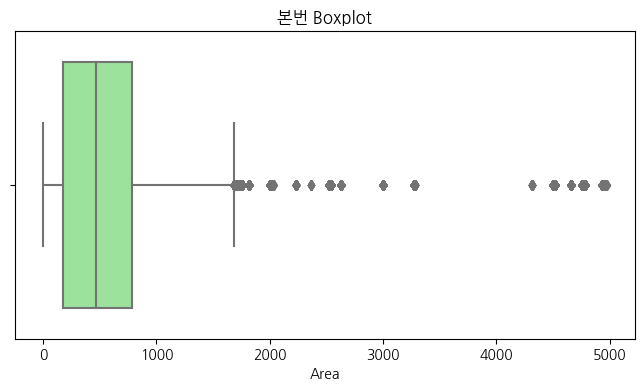

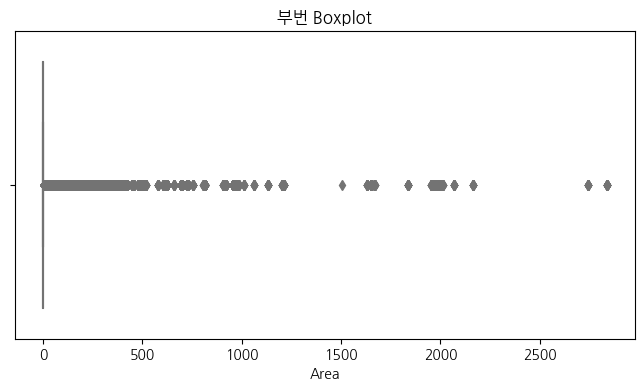

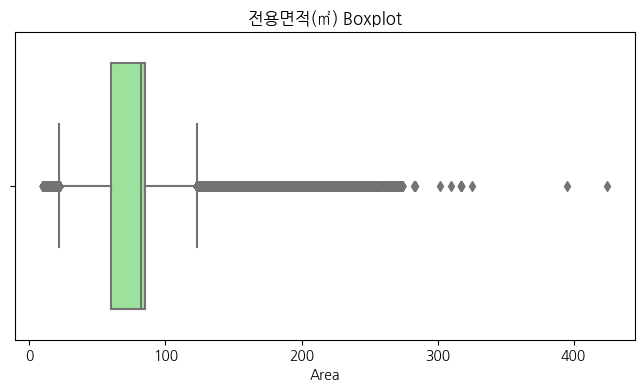

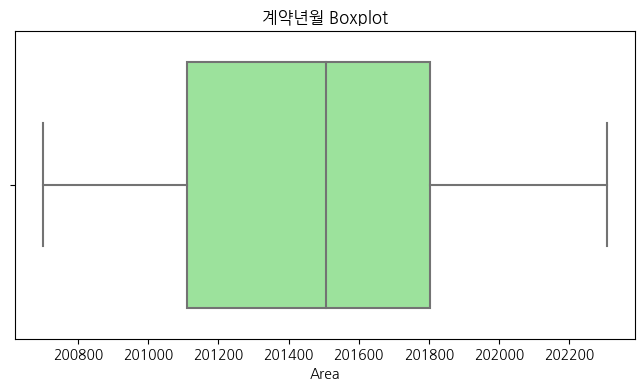

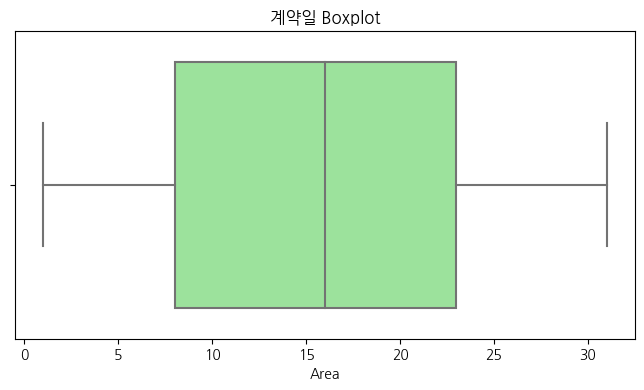

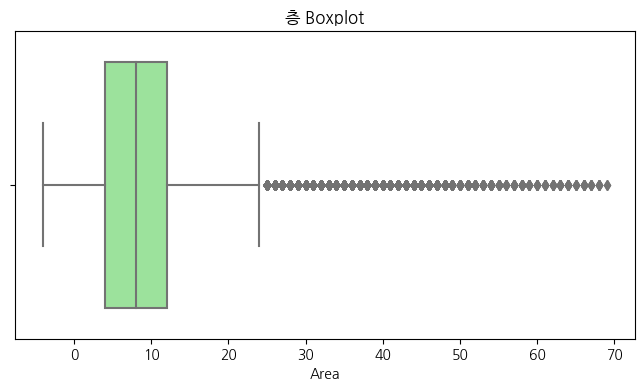

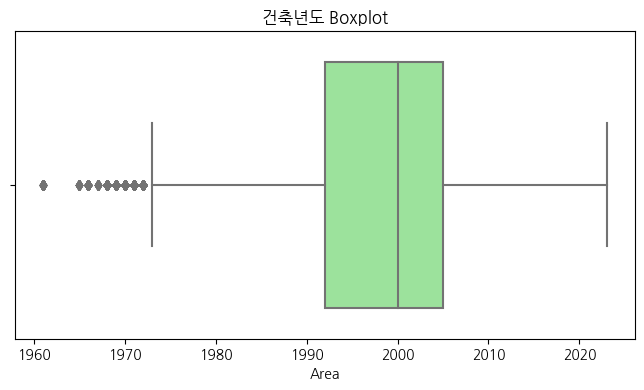

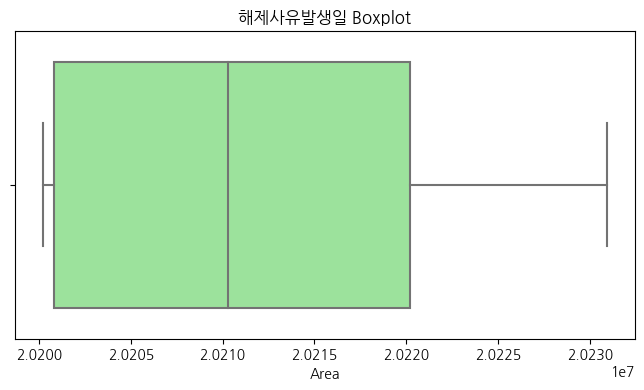

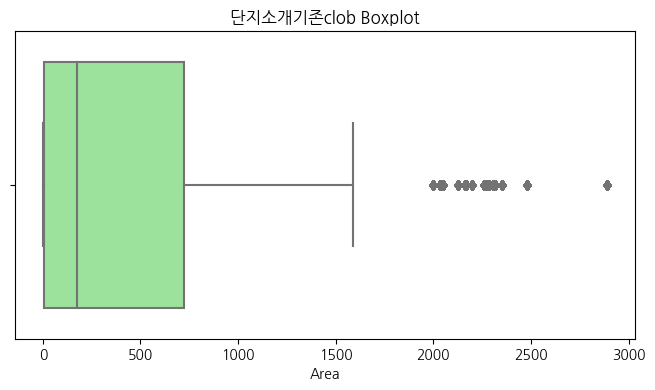

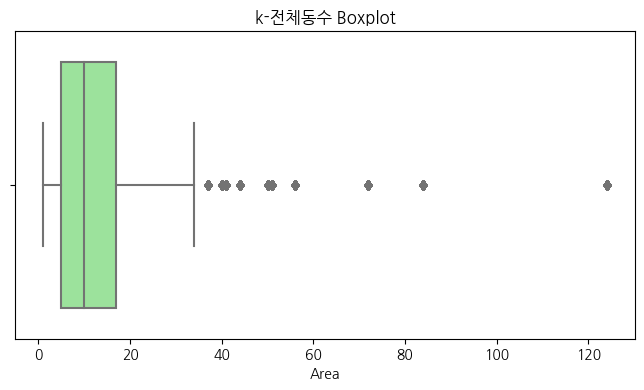

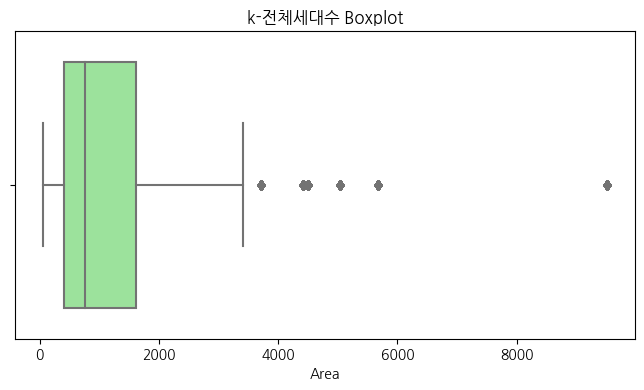

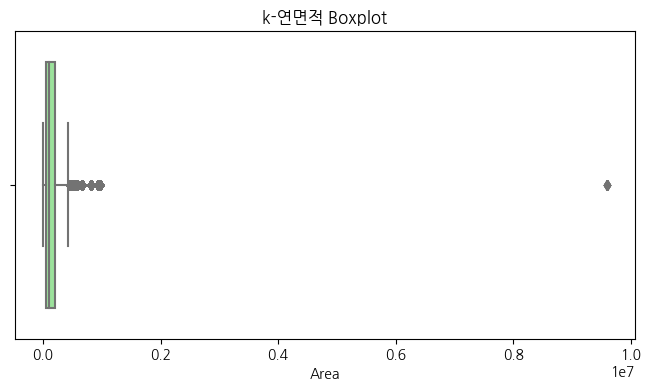

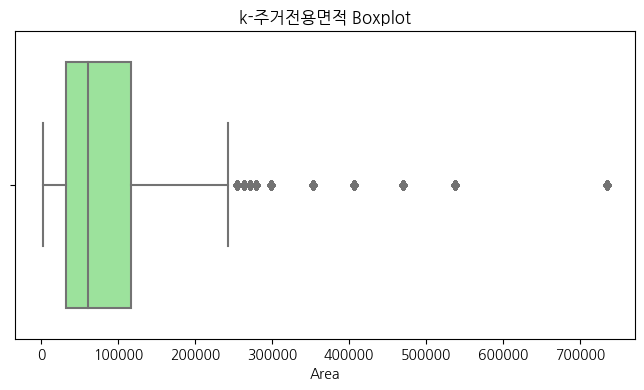

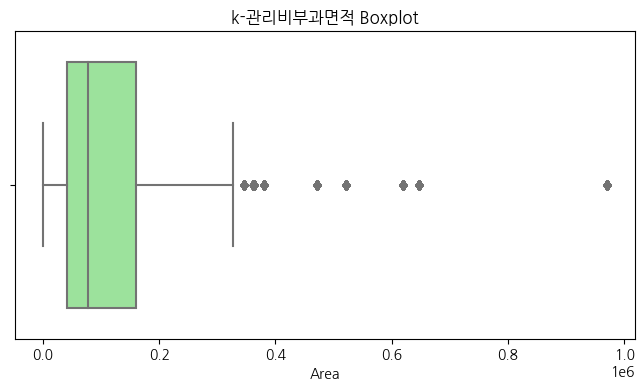

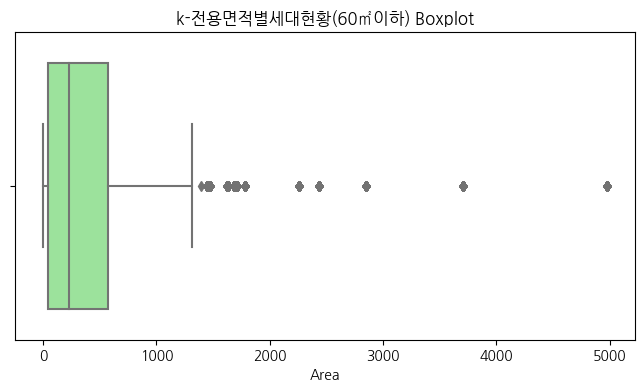

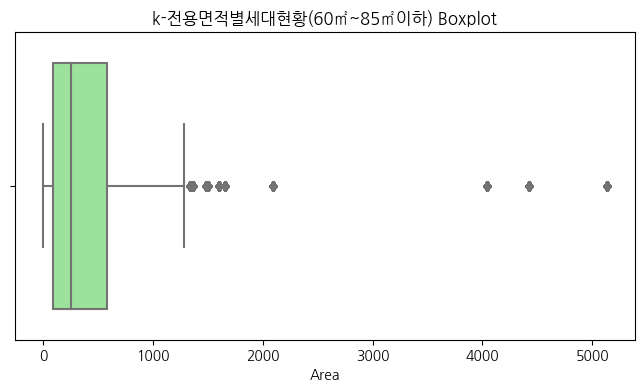

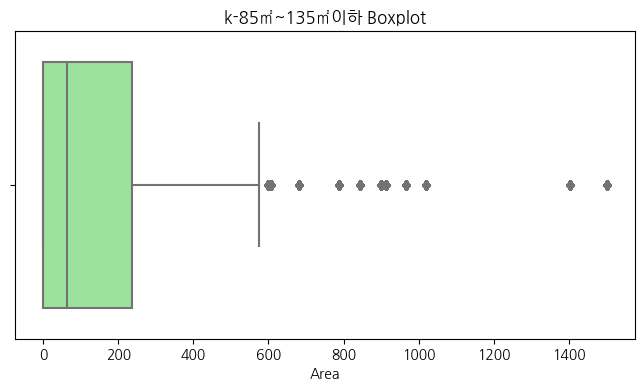

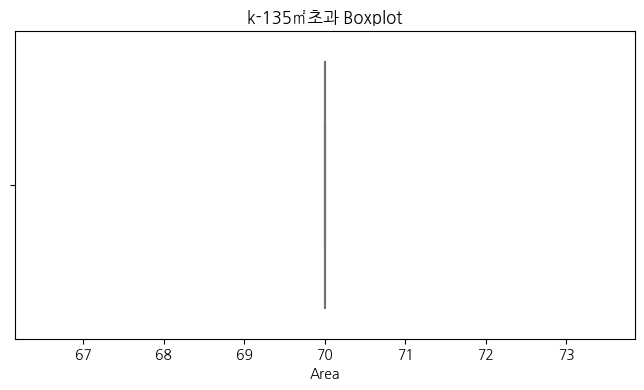

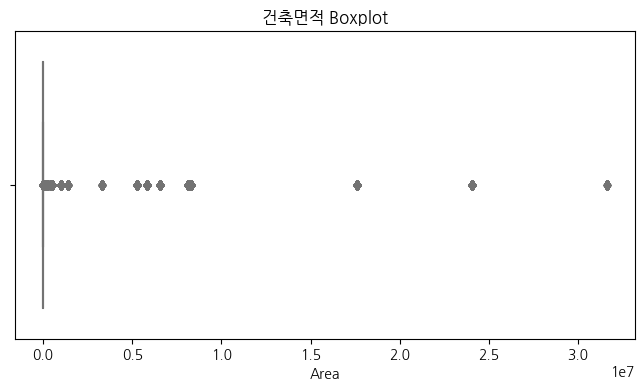

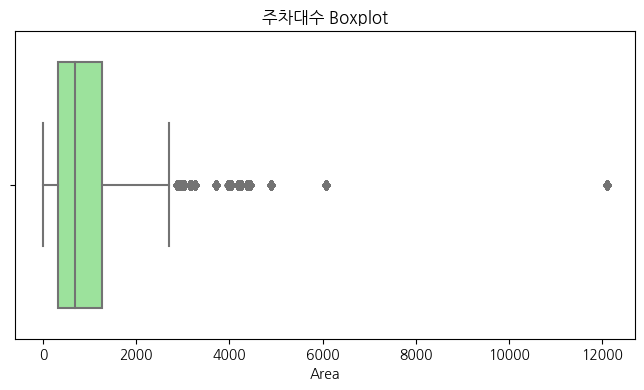

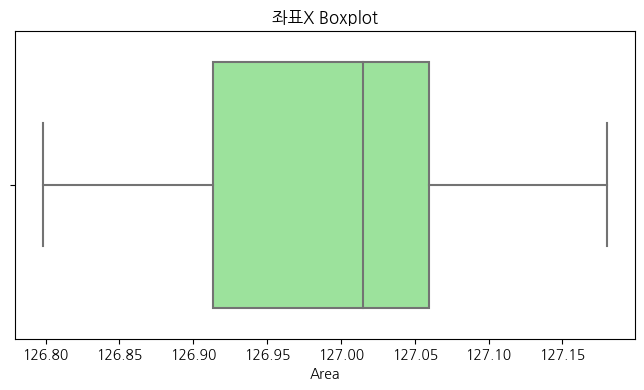

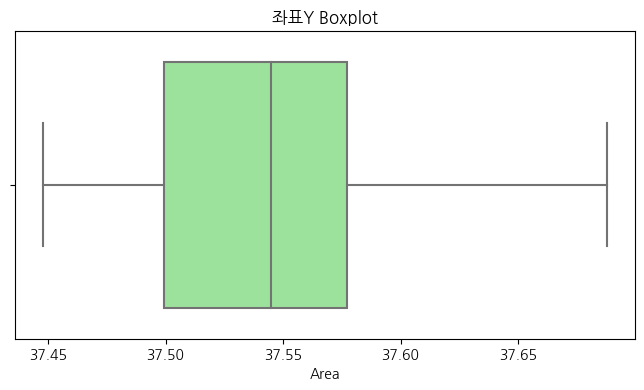

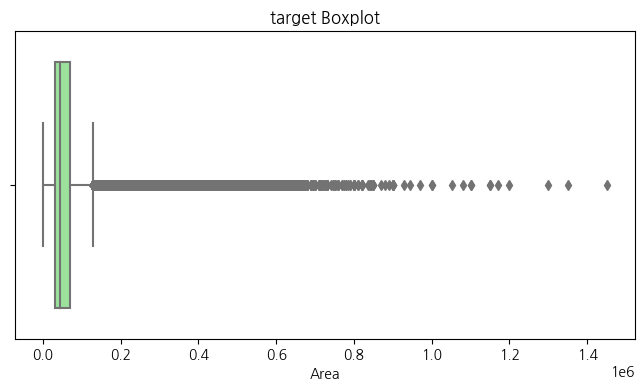

In [10]:
for col in continuous_columns:
    plt.figure(figsize=(8,4)) 
    sns.boxplot(data = train, x = col, color='lightgreen')
    plt.title(f"{col} Boxplot")
    plt.xlabel('Area')
    plt.show()

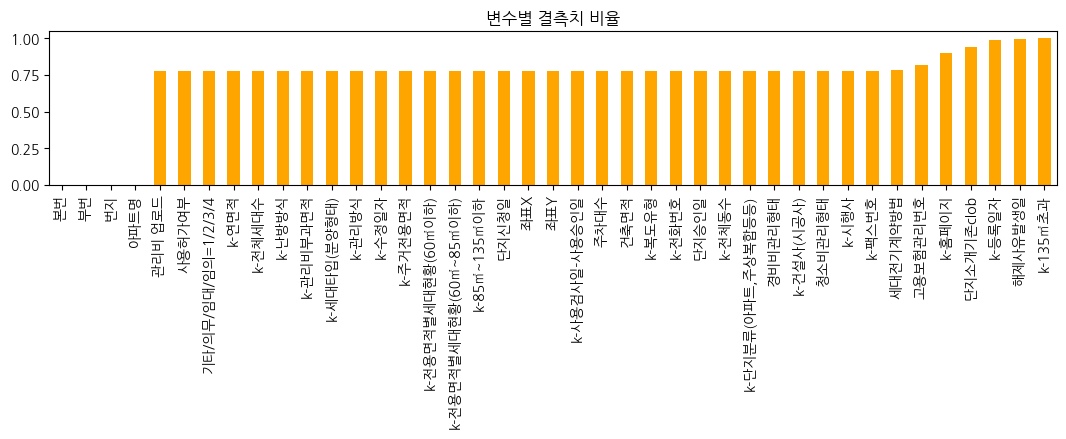

In [11]:
fig = plt.figure(figsize=(13, 2))
missing = train.isnull().sum() / train.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

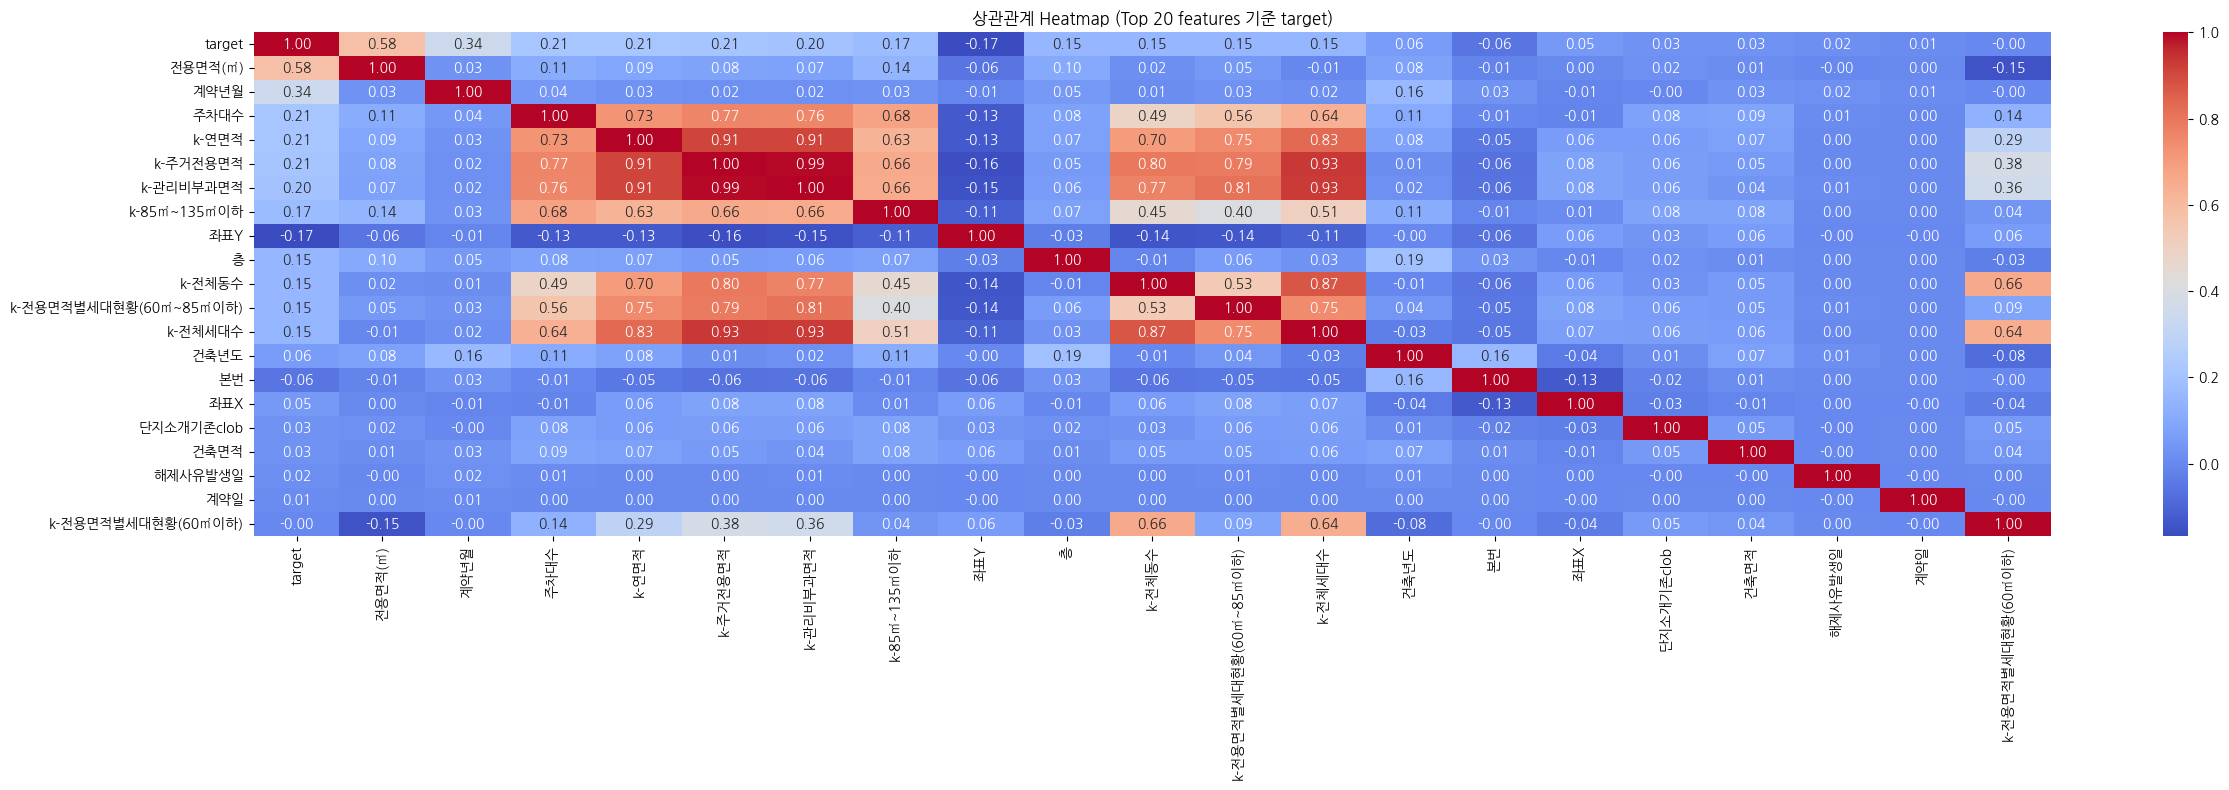

In [12]:
def plot_corr_heatmap(df, target_col="target", topn=20):
    """
    - train 데이터만 사용
    - 수치형 변수의 target과 상관관계 계산
    - 상위 N개 변수 + target으로 heatmap 시각화
    """
    # train만 필터링
   
    dtrain = df.copy()    
    # 수치형 변수만 선택
    num_cols = dtrain.select_dtypes(include=["number"]).columns.tolist()
    if target_col in num_cols:
        pass
    else:
        num_cols.append(target_col)

    # 결측치 중앙값 대체 (상관 안정화)
    dnum = dtrain[num_cols].copy()
    dnum = dnum.fillna(dnum.median())

    # 상관계수 행렬
    corr = dnum.corr()

    # target과 상관 높은 상위 N 변수 선택
    target_corr = corr[target_col].abs().sort_values(ascending=False)
    top_features = target_corr.head(topn+1).index.tolist()  # target 포함

    # Heatmap 그리기
    plt.figure(figsize=(1.2*len(top_features), 8))
    sns.heatmap(corr.loc[top_features, top_features], annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"상관관계 Heatmap (Top {topn} features 기준 {target_col})")
    plt.tight_layout()
    plt.show()

# ======================
# 사용 예시
# ======================
plot_corr_heatmap(train, target_col="target", topn=20)

In [ ]:
# 이상치 변수 제거 (선택) 

# 범주형 변수에 대한 보간
train[categorical_columns] = train[categorical_columns].fillna('NULL')

# 연속형 변수에 대한 보간 (선형 보간)
train[continuous_columns] = train[continuous_columns].interpolate(method='linear', axis=0)



In [41]:


# === 1) 우선순위 패턴 목록 (위에서 아래로 매칭) ===
# (정규식 패턴, 등급)
PATTERN_GRADED = [

    # ---- 5등급: 최상위 랜드마크/초고가 ----
    (r'한남더힐', 5),
    (r'나인원\s*한남|Nine\s*One\s*Hannam', 5),
    (r'PH\s*129|PH129', 5),
    (r'아크로\s*서울\s*포레스트|Acro\s*Seoul\s*Forest', 5),
    (r'아크로\s*리버\s*파크|Acro\s*River\s*Park', 5),

    # ---- 4등급: 강남권 최상위/프리미엄 플래그십 ----
    (r'원\s*베일리|원베일리|래미안\s*원\s*베일리', 4),
    (r'반포\s*자이', 4),
    (r'래미안\s*퍼스티지', 4),
    (r'압구정.*현대|현대.*압구정', 4),
    (r'디\s*에이치|THE\s*H|The\s*H', 4),             # 현대 고급 브랜드 (예: 디에이치 아너힐즈 등)
    (r'트리마제|Trimage', 4),
    (r'라클래시|래미안\s*라\s*클래시|Raemian\s*Laclass', 4),

    # ---- 3등급: 메이저 브랜드 일반/강남권 대단지 ----
    (r'래미안|Raemian', 3),
    (r'자이|Xi\b', 3),
    (r'아이\s*파크|I-?PARK|IPARK', 3),
    (r'푸르지오|Prugio', 3),
    (r'더\s*샵|The\s*Sharp', 3),
    (r'e\s*편한\s*세상|e편한세상|e-?Pyeonhansesang', 3),
    (r'센트레빌', 3),
    (r'래대푸|마포\s*래미안\s*푸르지오', 3),
    (r'헬리오\s*시티|Helio\s*City', 3),
    (r'파크리오', 3),
    (r'올림픽\s*선수촌', 3),
    (r'잠실\s*(리센츠|엘스|트리지움)', 3),

    # ---- 2등급: 준메이저/중상 브랜드, 대중적 신축/재건축 ----
    (r'힐스테이트|Hillstate', 2),
    (r'롯데\s*캐슬|Lotte\s*Castle', 2),
    (r'위브|We\'?ve', 2),
    (r'호반\s*(써밋|베르디움)', 2),
    (r'경남\s*아너스빌|아너스빌', 2),
    (r'두산', 2),
    (r'금호', 2),
    (r'벽산', 2),
    (r'현대\s*홈\s*타운', 2),

    # ---- 1등급: 기타/브랜드 미표기/중소 ----
    # 매칭 없으면 1로 처리
]

def brand_grade_from_name(name: str) -> int:
    """아파트명 문자열에서 브랜드/단지 키워드를 정규식으로 찾아 5~1등급 반환."""
    if pd.isna(name):
        return 1
    s = str(name).strip()
    # 공백/하이픈/대소문자 변형 허용을 위한 전처리(선택): 여기서는 정규식이 유연해서 생략 가능
    for pattern, grade in PATTERN_GRADED:
        if re.search(pattern, s, flags=re.IGNORECASE):
            return int(grade)
    return 1

In [42]:
# 건설사 변수 생성
# 건설사 등급 점수 매핑 (3: 대형, 2: 중견, 1: 기타)
company_score_3 = {
    '삼성물산': 3,
    '현대건설': 3,
    'GS건설': 3,
    'DL이앤씨': 2,
    'HDC현대산업개발': 2,
    '대우건설': 2,
    '포스코건설': 2,
    '롯데건설': 2,
    '호반건설': 1,
    '금호건설': 1,
    '쌍용건설': 1,
    '두산건설': 1,
}

def match_company_score(name: str) -> int:
    if pd.isna(name):
        return 1  # 결측치 -> 기타
    for comp, score in company_score_3.items():
        if re.search(comp, str(name)):
            return score
    return 1  # 어떤 회사명도 매칭 안 되면 '기타' = 1

In [43]:
def add_floor_bin(df, col="층"):
    """
    층 구간화 (binning) 컬럼 추가
    -1 이하: 지하층 → 0
     1~5층 : 저층 → 1
     6~15층: 중층 → 2
     16층 이상: 고층 → 3
    """
    conditions = [
        df[col] <= 0,                     # 지하
        (df[col] >= 1) & (df[col] <= 5),  # 저층
        (df[col] >= 6) & (df[col] <= 15), # 중층
        df[col] >= 16                     # 고층
    ]
    choices = [0, 1, 2, 3]

    df[col + "_bin"] = pd.Series(
        np.select(conditions, choices, default=np.nan),
        index=df.index
    ).astype("Int64")

    return df


In [44]:
# 파생변수 생성

# 계약년월 -> 계약년 / 계약월 분할 
train['계약년월'] = pd.to_datetime(train['계약년월'], format='%Y%m' )

train['계약년'] = train['계약년월'].dt.year
train['계약월'] = train['계약년월'].dt.month
# 기존 변수 삭제
del train['계약년월']

#-----------------------------------------------------------------------------------

# 시군구 -> 구 / 동 분리
train['구'] = train['시군구'].map(lambda x : x.split()[1])
train['동'] = train['시군구'].map(lambda x : x.split()[2])

# 기존 변수 삭제
del train['시군구']

#-----------------------------------------------------------------------------------

# 전용면적 비
total = (
train['k-전용면적별세대현황(60㎡이하)'].fillna(0) +
train['k-전용면적별세대현황(60㎡~85㎡이하)'].fillna(0) +
train['k-85㎡~135㎡이하'].fillna(0) +
train['k-135㎡초과'].fillna(0)
)

train['소형비율'] = train['k-전용면적별세대현황(60㎡이하)'] / total
train['중소형비율'] = train['k-전용면적별세대현황(60㎡~85㎡이하)'] / total
train['중대형비율'] = train['k-85㎡~135㎡이하'] / total
train['대형비율'] = train['k-135㎡초과'] / total


#-----------------------------------------------------------------------------------

# 서울 집값 등급 변수 생성
price_group = {
    "강남구": 3, "서초구": 3, "송파구": 3, "용산구": 3,
    "마포구": 2, "성동구": 2, "광진구": 2, "동작구": 2, "양천구": 2, "강동구": 2,
}
train["서울집값등급"] = train["구"].map(price_group).fillna(1)


#-----------------------------------------------------------------------------------

# 아파트 등급 변수 생성
train['아파트등급'] = train['아파트명'].apply(brand_grade_from_name).astype(int)

# 4, 5 분포가 적기 때문에 1,2,3을 구간화

# 아파트 등급 1~5 -> 1,2,3(보통),3(보통),3(보통) 으로 변환
bins_map_A = {1:1, 2:2, 3:3, 4:3, 5:3}

train['아파트등_bin_A'] = train['아파트등급'].map(bins_map_A).astype('Int64')


train['프리미엄아파트'] = train['아파트등급'].isin([4,5]).astype(int)
# 아파트등급 자체(1~5) + 프리미엄아파트(0/1) 병행

# 아파트등 변수 제거
train.drop('아파트등급',axis=1, inplace=True)


#-----------------------------------------------------------------------------------

# 건설사 등급 변수 추가 1, 2, ,3으로 변
train['건설사등급'] = train['k-건설사(시공사)'].apply(match_company_score).astype(int)


#-----------------------------------------------------------------------------------

# 계약년 - 건축년도를 매매당시 건물 나이 파생변수 생성
# 없을 경우 nan

if {'계약년','건축년도'}.issubset(train.columns):
    train['건물연차'] = (train['계약년'] - train['건축년도']).clip(lower=0, upper=100)
else:
    train['건물연차'] = np.nan

#-----------------------------------------------------------------------------------

# 좋은_도로 피처만 추가하는 간단한 코드

# 1. 프리미엄 도로 리스트
premium_roads = ['강남대로', '테헤란로', '도산대로', '논현로', '압구정로', '봉은사로', 
                '언주로', '반포대로', '서초대로', '잠실로', '올림픽로', '한강대로', 
                '여의대로', '을지로', '종로', '세종대로', '퇴계로', '소공로', '명동길']

# 2. 주요 도로 리스트 (확장)
major_roads_extended = [
    # 강남권 추가
    '선릉로', '역삼로', '학동로', '신사역로', '압구정역로', '청담로', '삼성로',
    '영동대로', '선릉역로', '개포로', '일원로', '수서로',
    
    # 서초/반포 추가  
    '방배로', '사평대로', '동작대로', '현충로', '서래로',
    
    # 송파/잠실 추가
    '백제고분로', '송파대로', '양재대로', '가락로', '문정로',
    
    # 여의도/마포 추가
    '마포대로', '양화로', '서강대로', '홍익로', '합정로',
    
    # 강북 주요 도로
    '동호로', '장충단로', '충무로', '명륜길', '대학로', '성균관로',
    '창경궁로', '돈화문로', '인사동길', '삼일대로', '청계천로',
    
    # 용산/이태원
    '이태원로', '한남대로', '보광로', '소월로',
    
    # 영등포/구로
    '영등포로', '당산로', '선유로', '경인로',
    
    # 기타 주요 간선도로
    '강변북로', '내부순환로', '외곽순환고속도로', '경부고속도로'
]

# 3. 전체 좋은 도로 리스트 (프리미엄 + 주요)
all_good_roads = premium_roads + major_roads_extended

# 4. 도로명 컬럼 (실제 컬럼명으로 수정 필요)
road_column = '도로명'  # '도로명주소', '주소' 등으로 변경

# 5. 좋은_도로 피처 생성
train['좋은_도로'] = train[road_column].astype(str).str.contains(
    '|'.join(all_good_roads), na=False
).astype(int)

#-----------------------------------------------------------------------------------

# 프리미엄 동 파생 변수 추가
dong_premium_dict = {
    # 최고 프리미엄 (5점) - 교육/부촌 1등급
    '대치동': 5, '도곡동': 5, '압구정동': 5, '청담동': 5, '반포동': 5,'서초동':5, 
    '방배동':5,'역삼동': 5, '논현동': 5, '개포동': 5,'한남동': 5,'성수동':5,
    
    # 중간 프리미엄 (4점) - 교육/비즈니스/신도시 핵심
    '잠원동': 4, '목동': 4, '중계동': 4, '상계동': 4, '잠실동': 4, '신천동': 4,'여의도동': 4,'강동':4,
    # 프리미엄 (3점)
    
    '중계동':3, '상계동':3, '관악구':3, '신림동':3, '봉천동':3, '사당동':3,'신촌동':3,'화양동':3, '자양동':3, '구의동':3
}

train['동프리미엄점수'] = train['동'].map(dong_premium_dict).fillna(1)

# 타입 변환
train['동프리미엄점수'] = train['동프리미엄점수'].astype(int)

#-----------------------------------------------------------------------------------

# 구별 프리미엄 점수 (5, 4, 3, 1)
district_premium = {
    5: ['강남구', '서초구', '송파구','강동구'],  # 최고급 (강남 3구)
    4: ['마포구', '용산구', '성동구', '광진구', '강동구', '영등포구','노원구'],  # 고급
    3: ['구로구', '양천구', '강서구', '종로구', '중구', '동작구', '관악구', '서대문구', '은평구', '성북구'],  # 중급
    1: ['중랑구', '동대문구','도봉구', '강북구', '금천구']  # 일반
}

def get_district_score(district_name):
    if pd.isna(district_name):
        return 1
    
    district_str = str(district_name)
    for score, districts in district_premium.items():
        for district in districts:
            if district in district_str:
                return score
    return 1

# 구 프리미엄 점수 적용
train['구_프리미엄점수'] = train['구'].apply(get_district_score)
train['구_프리미엄점수'] = train['구'].apply(get_district_score)

# 확인
print("구 프리미엄 점수 분포:")
print(train['구_프리미엄점수'].value_counts().sort_index())

#-----------------------------------------------------------------------------------
# 층 구간화   0 > 지하 , 1 ~ 5 저증, 6 ~ 15 중층, 16 <= 고층

train = add_floor_bin(train, col="층")


#-----------------------------------------------------------------------------------

# 전용면적 보기 쉬운 이름으로 변경
train['전용면적'] = train['전용면적(㎡)']
train.drop('전용면적(㎡)', axis=1,inplace=True)

# 전용면적 구간화
bins   = [0, 60, 85, 135, float('inf')]
labels = ['≤60','60–85','85–135','>135']
for df in (train, train):
    df['전용면적_bin'] = pd.cut(df['전용면적'], bins=bins, labels=labels, right=True)
    
# 원본 면적은 제거, 로그만 유지
train = train.drop(columns=['전용면적'], errors='ignore')
#-----------------------------------------------------------------------------------
if {'주차대수','k-전체세대수'}.issubset(train.columns):
    train['주차율'] = train['주차대수'] / train['k-전체세대수']
if {'k-전체세대수','k-전체동수'}.issubset(train.columns):
    train['동당세대수'] = train['k-전체세대수'] / train['k-전체동수']
if {'k-연면적','건축면적'}.issubset(train.columns):
    train['연면적_대_건축면적'] = train['k-연면적'] / train['건축면적']
if {'k-주거전용면적','k-연면적'}.issubset(train.columns):
    train['전용면적비율'] = train['k-주거전용면적'] / train['k-연면적']
if {'k-주거전용면적','k-전체세대수'}.issubset(train.columns):
    train['세대당전용면적'] = train['k-주거전용면적'] / train['k-전체세대수']
    
#-----------------------------------------------------------------------------------



구 프리미엄 점수 분포:
1    170841
3    404987
4    285105
5    257889
Name: 구_프리미엄점수, dtype: int64


In [ ]:
# 아래 코드는 일부 전처리 과정은 생략했음.. 일부는 실행이 되지만 데이터 타입에 따라서 변환 과정 필요함


# 외부 파생변수 추가
# 날짜로 동일한 키 생
train['year_month']= pd.to_datetime(train['계약년월'],format='%Y%m')
interest_rate['year_month'] = pd.to_datetime(interest_rate['연_월'], format='%Y%m')

# 
# 정렬 (시계열 기준으로)
interest_rate = interest_rate.sort_values('연_월').reset_index(drop=True)

# Lag 변수 생성
interest_rate['rate_lag1'] = interest_rate['한국은행_기준금리'].shift(1)
interest_rate['rate_lag3'] = interest_rate['한국은행_기준금리'].shift(3)

# 변화량(전월 대비 차이)
interest_rate['전월_대비_차이'] = interest_rate['한국은행_기준금리'].diff(1)

# 이동평균 (3개월)
interest_rate['이동평균_3개월'] = interest_rate['한국은행_기준금리'].rolling(window=3, min_periods=1).mean()

# 2023/01 ~ 2023/09 금리가 동일함 
interest_rate.query('연_월 > "2023-06-01"')

# 전부 같은 값이기에 테스트 세트 성능에 변화없음
interest_rate.drop(['rate_lag1','rate_lag3','전월_대비_차이','이동평균_3개월'],axis=1, inplace=True)

# 2) 분위수(33%, 66%)로 저/중/고 구간화
q1 = interest_rate["한국은행_기준금리"].quantile(0.33)
q2 = interest_rate["한국은행_기준금리"].quantile(0.66)

# pd.cut으로 벡터화 분류
bins = [-np.inf, q1, q2, np.inf]
labels = [1, 2, 3]  # 1=저, 2=중, 3=고
interest_rate["rate_level"] = pd.cut(interest_rate["한국은행_기준금리"], bins=bins, labels=labels).astype(int)

# 잘 분류 됬는지 확
interest_rate['rate_level'].value_counts()

# 날짜 키를 이용해서 merge
train = train.merge(interest_rate, on='year_month', how='left')

#---------------------------------------------------------------------------------------------------------------

# 거래량 데이터 날짜 키 생성
volume['year_month'] = pd.to_datetime(volume['시점'], format='%Y-%m')

# 기존 날짜 변수 삭제
volume.drop('시점',axis=1,inplace=True)

# 날짜 키를 이용해서 merge
train = train.merge(volume, on='year_month', how='left')

# 거래량 타입 변환
train['거래량'] = train['거래량'].astype(int)

# 상호작용 피처 생
train["rate_x_volume"] = train["한국은행_기준금리"].astype(float) * train["거래량"].astype(float)
test["rate_x_volume"]  = test["한국은행_기준금리"].astype(float)  * test["거래량"].astype(float)

# 고금리이면서 거래량이 높은 행 확인 피처
train["vol_high_in_high_rate"] = ((train["rate_level"]==3) & (train["거래량"]>train["거래량"].median())).astype(int)

# train에는 고금리 + 거래량이 많은 경우 1이 되서 시점이 다양하게 분포된 train 데이터에는 효과적
train['vol_high_in_high_rate'].value_counts()

# test 데이터는 전부 고금리이지만 거래량이 median값을 넘지 못해서 전부 0이됌 그러므로 상수 피처임 drop해야함
# rate_level feature에 경우 실제 모델링/실무라면 미래에 금리가 움직일 수 있으니 남기는 게 의미가 있을 수 있지만 현재 ML경진대회에 정답을 예측하는 관점에서는 상수 feature임 그러므로 drop
train.drop(['rate_level','vol_high_in_high_rate','한국은행_기준금리'],axis=1, inplace=True)
test.drop(['rate_level','vol_high_in_high_rate','한국은행_기준금리'],axis=1, inplace=True)

#------------------------------------------------------------------------------------------------------------------

# monthly_cpi - 전월비-전월동월비 데이터
# year_month를 연-월 문자열로 변환
monthly_cpi['year_month'] = pd.to_datetime(monthly_cpi['시점'], format='%Y-%m').dt.strftime('%Y-%m')
monthly_cpi['year_month'] = pd.to_datetime(monthly_cpi['year_month'],format='%Y-%m')

# 전체 연도 10월이 누락되서 1로 나타남
# 10월로 다시 변

df_main = monthly_cpi.copy()
# 1) 연/월 분리
df_main['Y'] = df_main['year_month'].dt.year
df_main['M'] = df_main['year_month'].dt.month

# 2) 연도별로 '1월이 2개 이상' & '10월 없음'인 연도만 대상으로
bad_years = (
    df_main.groupby('Y')['M']
      .agg(lambda s: (s.eq(1).sum() >= 2) and (10 not in set(s)))
)
bad_years = set(bad_years[bad_years].index)

# 3) 그 연도 중에서 '1월'인 행만 후보로 잡고, 같은 연도-같은 1월 중 "두 번째 이후"만 10월로 교정
df_main['rank_in_jan'] = (
    df_main.sort_values(['Y', 'year_month'])
      .groupby(['Y'])['M']
      .transform(lambda s: s.eq(1).cumsum())
)

mask = (df_main['Y'].isin(bad_years)) & (df_main['M'] == 1) & (df_main['rank_in_jan'] >= 2)
n_fix = int(mask.sum())
if n_fix > 0:
    df_main.loc[mask, 'M'] = 10
    # 교정된 Y, M으로 year_month 재생성
    df_main.loc[mask, 'year_month'] = pd.to_datetime(
        df_main.loc[mask, 'Y'].astype(str) + '-' + df_main.loc[mask, 'M'].astype(str).str.zfill(2) + '-01'
    )

print(f"교정된 행: {n_fix}개")
monthly_cpi = df_main.drop(columns=['Y','M','rank_in_jan'])

# 월 단위로 변
monthly_cpi['year_month'] = monthly_cpi['year_month'].dt.to_period('M')
monthly_cpi['year_month'] = monthly_cpi['year_month'].astype(str)

# 날짜 키를 이용해서 merge
train = train.merge(monthly_cpi, on='year_month', how='left')

#-----------------------------------------------------------------------------------------------------------------

# cpi = 소비자물가지수 총_cpi
# rename과 타입변환 
cpi.rename(columns={'시점':'year_month'},inplace=True)
cpi['year_month'] = cpi['year_month'].astype(str)
cpi['year_month'] = pd.to_datetime(cpi['year_month'], format='%Y-%m').dt.strftime('%Y-%m')
cpi['year_month'] = pd.to_datetime(cpi['year_month'],format='%Y-%m')


# 동일하게 10월이 1월로 표기됌
# 10월로 변경

df_main_CPI = cpi.copy()
# 1) 연/월 분리
df_main_CPI['Y'] = df_main_CPI['year_month'].dt.year
df_main_CPI['M'] = df_main_CPI['year_month'].dt.month

# 2) 연도별로 '1월이 2개 이상' & '10월 없음'인 연도만 대상으로
bad_years = (
    df_main_CPI.groupby('Y')['M']
      .agg(lambda s: (s.eq(1).sum() >= 2) and (10 not in set(s)))
)
bad_years = set(bad_years[bad_years].index)

# 3) 그 연도 중에서 '1월'인 행만 후보로 잡고, 같은 연도-같은 1월 중 "두 번째 이후"만 10월로 교정
df_main_CPI['rank_in_jan'] = (
    df_main_CPI.sort_values(['Y', 'year_month'])
      .groupby(['Y'])['M']
      .transform(lambda s: s.eq(1).cumsum())
)

mask = (df_main_CPI['Y'].isin(bad_years)) & (df_main_CPI['M'] == 1) & (df_main_CPI['rank_in_jan'] >= 2)
n_fix = int(mask.sum())
if n_fix > 0:
    df_main_CPI.loc[mask, 'M'] = 10
    # 교정된 Y, M으로 year_month 재생성
    df_main_CPI.loc[mask, 'year_month'] = pd.to_datetime(
        df_main_CPI.loc[mask, 'Y'].astype(str) + '-' + df_main_CPI.loc[mask, 'M'].astype(str).str.zfill(2) + '-01'
    )

# 교정된 행 확
print(f"교정된 행: {n_fix}개")
cpi = df_main_CPI.drop(columns=['Y','M','rank_in_jan'])

# 월 단위로 변환 후 이어서 문자열로 변환
cpi['year_month'] = cpi['year_month'].dt.to_period('M')
cpi['year_month'] = cpi['year_month'].astype(str)

# 날짜 기준으로 merge
train = train.merge(cpi, on='year_month', how='left')

#-----------------------------------------------------------------------------------------------------------------

# gdp 데이터 
# 이름 변
renames= {"변환" : "분기",
          "원자료" : "gdp_value"}

gdp.rename(columns= renames, inplace=True)

# / 없애기
gdp["분기_clean"] = gdp["분기"].str.replace("/", "")



import pandas as pd
import numpy as np

# === 0) 준비: 컬럼 이름 통일 ===
gdp = gdp.copy()
gdp.columns = [str(c).strip() for c in gdp.columns]
if "분기" not in gdp.columns:
    raise KeyError("gdp['분기'] 컬럼이 필요합니다.")
if "gdp_value" not in gdp.columns:
    # 값 컬럼 자동 추정 (분기 제외 첫 번째)
    val_col = [c for c in gdp.columns if c != "분기"][0]
    gdp = gdp.rename(columns={val_col: "gdp_value"})

# === 1) 값 숫자화 (쉼표/공백 제거) ===
gdp["gdp_value"] = (
    gdp["gdp_value"].astype(str)
    .str.replace("\u00A0", " ", regex=False)  # non-breaking space
    .str.replace(",", "", regex=False)
    .str.strip()
)
gdp["gdp_value"] = pd.to_numeric(gdp["gdp_value"], errors="coerce")

# === 2) 분기 문자열 정규화 → Period → 분기 시작월 ===
# "2006/Q4" -> "2006Q4"
gdp["분기_clean"] = gdp["분기"].astype(str).str.replace("/", "", regex=False).str.strip()

# 분기 시작월(기본: 3,6,9,12월 종료 분기 체계, 즉 Q-DEC)
gdp["quarter_start"] = pd.PeriodIndex(gdp["분기_clean"], freq="Q-DEC").to_timestamp(how="start")

# 시간 순 정렬
gdp = gdp.sort_values("quarter_start").reset_index(drop=True)

# === 3) 분기값을 월별 누적으로 분해 (prev → curr를 3등분 누적) ===
rows = []
for i in range(1, len(gdp)):
    prev_val = gdp.loc[i-1, "gdp_value"]
    curr_val = gdp.loc[i,   "gdp_value"]
    start    = gdp.loc[i,   "quarter_start"]  # 해당 분기 시작월 (예: 7월)

    if pd.isna(prev_val) or pd.isna(curr_val) or pd.isna(start):
        continue

    # prev→curr를 3등분한 누적 값: [M1, M2, M3] = (prev→curr linspace에서 첫 점 제외)
    monthly_vals = np.linspace(prev_val, curr_val, 4)[1:]  # 길이 3
    months = [start + pd.DateOffset(months=m) for m in range(3)]

    for ym, v in zip(months, monthly_vals):
        rows.append({"year_month": ym.strftime("%Y-%m"), "gdp_monthly_est": v})

gdp_monthly = pd.DataFrame(rows)


# 타입변
train["year_month"] = pd.to_datetime(train["year_month"], errors="coerce").dt.to_period("M").astype(str)
gdp_monthly["year_month"] = pd.to_datetime(gdp_monthly["year_month"], errors="coerce").dt.to_period("M").astype(str)

# 날짜 키 기준으로 merge
train = train.merge(gdp_monthly, on="year_month", how="left")

# 소수점이 1칸까
train["gdp_monthly_est"] = train["gdp_monthly_est"].round(1)

# 확인
print(train["gdp_monthly_est"].map(lambda x: f"{x:.1f}").head())


# 보기 편한 이름으로 전부 변경
renames = {'rate_x_volume' : '금리_x_거래량',
           '전월비(%)' : '전월비',
           '전년동월비(%)' : '전년동월비',
           '서울특별시' : '총_CPI',
           'gdp_monthly_est' : '월별_GDP_추정치'}
train.rename(columns=renames, inplace=True)
test.rename(columns=renames, inplace=True)

In [ ]:
# 위도, 경도 좌표계산 (BallTree)
from sklearn.neighbors import BallTree

# ===== 파라미터 =====
BUS_LIMIT_M = 300          # 500~800m 중 네가 원하는 값으로 변경
EARTH_RADIUS_KM = 6371.0

# ===== 입력 =====
# train: 집 좌표가 들어있는 DF, 컬럼명 예시 ['위도','경도']
# bus: 버스정류장 DF, 컬럼명 예시 ['버스정류장','위도','경도']
# 결측/비정상 좌표 제거 (선택)
train_ = train.dropna(subset=['위도','경도']).copy()
bus_ = bus.dropna(subset=['위도','경도']).copy()

# ===== 라디안 변환 =====
train_coords_rad  = np.radians(train_[['위도','경도']].values)
bus_coords_rad = np.radians(bus_[['위도','경도']].values)

# ===== BallTree (하버사인) =====
tree = BallTree(bus_coords_rad, metric='haversine')

# 반경(m) -> 라디안
radius_rad = (BUS_LIMIT_M / 1000.0) / EARTH_RADIUS_KM

# 반경 내 존재 여부 (binary)
inside_indices = tree.query_radius(train_coords_rad, r=radius_rad)
train_['bus_nearby'] = [1 if len(idxs) > 0 else 0 for idxs in inside_indices]

# 가장 가까운 지하철역까지의 거리(미터) & 이름(옵션)
# BallTree.query 반환 거리 단위: 라디안 -> m 로 변환
dist_rad, ind = tree.query(train_coords_rad, k=1)
nearest_dist_m = dist_rad[:, 0] * EARTH_RADIUS_KM * 1000.0
nearest_idx = ind[:, 0]

train_['nearest_bus_dist_m'] = nearest_dist_m.round(1)
train_['nearest_bus_name'] = bus_.iloc[nearest_idx]['정류소명'].values


train[['bus_nearby','nearest_bus_dist_m','nearest_bus_name']] = \
    train_.reindex(train.index)[['bus_nearby','nearest_bus_dist_m','nearest_bus_name']]



#-----------------------------------------------------------------------------------

# 지하철도 똑같이 적용

# ===== 파라미터 =====
SUBWAY_LIMIT_M = 800
EARTH_RADIUS_KM = 6371.0

# ===== 좌표 숫자화 & 결측 제거 =====
for df in (train, subway):
    df[['위도','경도']] = df[['위도','경도']].apply(pd.to_numeric, errors='coerce')

train_  = train.dropna(subset=['위도','경도']).copy()
subway_ = subway.dropna(subset=['위도','경도']).copy()

# ===== 라디안 변환 (반드시 [위도, 경도] 순서) =====
train_coords_rad  = np.radians(train_[['위도','경도']].to_numpy())
subway_coords_rad = np.radians(subway_[['위도','경도']].to_numpy())

# ===== BallTree (haversine) =====
subway_tree = BallTree(subway_coords_rad, metric='haversine')

# 반경(m) -> 라디안
radius_rad = (SUBWAY_LIMIT_M / 1000.0) / EARTH_RADIUS_KM

# 반경 내 존재 여부 (binary)
inside_indices = subway_tree.query_radius(train_coords_rad, r=radius_rad)
train_['subway_nearby'] = np.fromiter((len(ix) > 0 for ix in inside_indices), dtype=int, count=len(train_))

# 가장 가까운 지하철역까지의 거리(미터) & 이름
# query 반환 거리는 라디안 -> 미터로 변환
dist_rad, ind = subway_tree.query(train_coords_rad, k=1)
nearest_dist_m = dist_rad[:, 0] * EARTH_RADIUS_KM * 1000.0
nearest_idx    = ind[:, 0]

train_['nearest_subway_dist_m'] = nearest_dist_m.round(1)
train_['nearest_subway_name']   = subway_.iloc[nearest_idx]['역사명'].to_numpy()

# ===== 원본 인덱스에 정렬해서 할당 =====
cols = ['subway_nearby','nearest_subway_dist_m','nearest_subway_name']
train[cols] = train_.reindex(train.index)[cols]

In [ ]:
# 로그 변환
log_cols = [
    "층",
    "k-전체동수",
    "k-전체세대수",
    "k-연면적",
    "전용면적",
    "k-관리비부과면적",
    "주차대수",
    '건축면적'
]

# 새로운 컬럼명은 _log를 붙여서 추가
for col in log_cols:
    if col in train.columns:
        # 음수/0 방지: 0보다 작은 값은 0으로 클리핑 후 log1p 적용
        train[col + "_log"] = np.log1p(train[col].clip(lower=0))

# 로그 변환한 컬럼 리스트
log_cols = [
    "층_log",
    "k-전체동수_log",
    "k-전체세대수_log",
    "k-연면적_log",
    "전용면적_log",
    "k-관리비부과면적_log",
    "주차대수_log",
    "건축면적_log"
]

# 0값 비율 확인
zero_check = {}
for col in log_cols:
    if col in train.columns:
        zero_ratio = (train[col] == 0).mean()
        zero_count = (train[col] == 0).sum()
        zero_check[col] = {"zero_count": zero_count, "zero_ratio": round(zero_ratio, 4)}

zero_report = pd.DataFrame(zero_check).T.sort_values("zero_ratio", ascending=False)
print("로그 변환 컬럼별 0값 현황")
display(zero_report)

In [29]:
# 가중치 생성 코드
# 년도별 샘플 갯수로 중앙값을 구함
# 샘플 수 중앙값 / 각 연도별 샘플 수 
# 샘플 수가 적을수록 가중치 UP / 샘플 수가 많을수록 가중치 DOWN

YEAR_COL = '계약연도'
DATE_COL = '계약년월'

# 경로
ROOT = Path("/workspace/project/upstage-ml-regression-sigma7")
DATA_RAW = ROOT / "data/raw"
DATA_PROC = ROOT / "data/processed"
TRAIN_WEIGHTED_CSV = DATA_PROC / "train_weighted.csv"
TRAIN_CSV = DATA_RAW / "train.csv"

def ensure_year(df: pd.DataFrame) -> pd.DataFrame:
    if YEAR_COL not in df.columns:
        if DATE_COL in df.columns:
            s = df[DATE_COL].astype(str).str.replace(r"\D","",regex=True).str[:6] + "01"
            dt = pd.to_datetime(s, format="%Y%m%d", errors="coerce")
            df[YEAR_COL] = dt.dt.year
        else:
            raise ValueError(f"'{YEAR_COL}'도 없고 '{DATE_COL}'도 없어 연도 파생을 할 수 없습니다.")
    return df

def compute_year_weights(df: pd.DataFrame) -> dict:
    freq = df[YEAR_COL].value_counts(dropna=True).sort_index()
    med = np.median(freq.values)
    weights = med / freq
    return weights.to_dict()

def attach_weights(df: pd.DataFrame, wmap: dict) -> pd.DataFrame:
    out = df.copy()
    out["sample_weight"] = out[YEAR_COL].map(wmap).astype(float).fillna(1.0)
    return out

def safe_read_csv(path: str, sep: Optional[str] = None, encodings=("utf-8","cp949")) -> pd.DataFrame:
    path = str(path)
    if sep is None:
        with open(path, "rb") as f:
            raw = f.read(256*1024)
        txt = None
        for enc in encodings:
            try:
                txt = raw.decode(enc, errors="ignore"); break
            except Exception: pass
        if txt is None:
            txt = raw.decode("utf-8", errors="ignore")
        sep = sniff_delimiter(txt)

    for enc in encodings:
        try:
            return pd.read_csv(path, engine="c", encoding=enc, sep=sep, low_memory=True, quoting=csv.QUOTE_MINIMAL)
        except Exception as e1:
            print(f"[WARN] C-engine({enc}) 실패: {e1}")
        try:
            return pd.read_csv(path, engine="python", encoding=enc, sep=sep, on_bad_lines="skip", quoting=csv.QUOTE_MINIMAL)
        except Exception as e2:
            print(f"[WARN] python-engine({enc}) 실패: {e2}")

    # 폴백: 청크
    frames = []
    for enc in encodings:
        try:
            for chunk in pd.read_csv(path, engine="python", encoding=enc, sep=sep, on_bad_lines="skip",
                                     quoting=csv.QUOTE_MINIMAL, chunksize=500_000):
                frames.append(chunk)
            if frames:
                return pd.concat(frames, ignore_index=True)
        except Exception as e3:
            print(f"[WARN] chunk read 실패({enc}): {e3}")
    raise RuntimeError(f"safe_read_csv 실패: {path}")

    # ---- 안전한 CSV 로더 ----
def sniff_delimiter(sample_text: str) -> str:
    for cand in [",", "\t", "|", ";"]:
        if cand in sample_text:
            return cand
    return ","


# ----- 실행 -----
train = safe_read_csv(TRAIN_CSV)
train = ensure_year(train)
wmap = compute_year_weights(train)
train_w = attach_weights(train, wmap)

DATA_PROC.mkdir(parents=True, exist_ok=True)
train_w.to_csv(TRAIN_WEIGHTED_CSV, index=False)
print(f"[OK] 저장: {TRAIN_WEIGHTED_CSV}, shape={train_w.shape}, sample_weight range=({train_w['sample_weight'].min():.3f} ~ {train_w['sample_weight'].max():.3f})")

[OK] 저장: /workspace/project/upstage-ml-regression-sigma7/data/processed/train_weighted.csv, shape=(1118822, 54), sample_weight range=(0.566 ~ 5.556)


In [31]:
# 디버깅 모드
# 실험 환경 세팅
def make_debug_data(train, test, frac=0.05, random_state=42):
    """
    train/test 데이터를 frac 비율만큼 축소해서 반환
    frac=0.05 → 5% 샘플만 사용
    """
    train_debug = train.sample(frac=frac, random_state=random_state).reset_index(drop=True)
    test_debug  = test.sample(frac=frac, random_state=random_state).reset_index(drop=True)
    return train_debug, test_debug

# 사용 예시
train_debug, test_debug = make_debug_data(train, test, frac=0.05)

print("원본 train 크기:", train.shape, " → debug:", train_debug.shape)
print("원본 test 크기 :", test.shape,  " → debug:", test_debug.shape)

원본 train 크기: (1118822, 53)  → debug: (55941, 53)
원본 test 크기 : (9272, 51)  → debug: (464, 51)


In [ ]:
# 인코딩 예시 (기본) 범주형

df = pd.DataFrame({
    "color": ["red", "blue", "green", "blue", "red", "green", "red"],
    "target": [1, 0, 1, 0, 1, 0, 1]
})



# 라벨인코딩

le = LabelEncoder()
df["color_label"] = le.fit_transform(df["color"])

#----------------------------------------------------------------------------

# 빈도 인코딩

freq = df["color"].value_counts()
df["color_freq"] = df["color"].map(freq)

#----------------------------------------------------------------------------

# 원-핫 인코딩

df_onehot = pd.get_dummies(df, columns=["color"], prefix="color")


#----------------------------------------------------------------------------

# 타겟 인코딩
mean_target = df.groupby("color")["target"].mean()
df["color_target_enc"] = df["color"].map(mean_target)



In [ ]:
# 인코딩 예시 (기본) 연속형

df = pd.DataFrame({
    "height": [150, 160, 170, 180, 190],
    "weight": [50, 65, 80, 90, 100]
})


#----------------------------------------------------------------------------

# 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(df)

df_std = pd.DataFrame(df_std, columns=df.columns)


#----------------------------------------------------------------------------

# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)

df_norm = pd.DataFrame(df_norm, columns=df.columns)



In [ ]:
# lightgbm 모델 (기본)

# 예제 데이터
df = pd.DataFrame({
    "x1": [1,2,3,4,5,6,7,8,9,10],
    "x2": [5,6,7,8,9,10,11,12,13,14],
    "y":  [1,0,1,0,1,0,1,0,1,0]
})

X = df[["x1","x2"]]
y = df["y"]

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1
)

# 학습
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="logloss",
    early_stopping_rounds=50
)

# 예측 및 평가
y_pred = model.predict(X_valid)
print("MSE:", mean_squared_error(y_valid, y_pred))

In [45]:
#| 파라미터                 |기본값| 역할                             | 실무 팁                                                        |
#| ----------------------- | ---- | ---------------------------------| ------------------------------------------------------------- |
#| **n\_estimators**       | 100  | 부스팅 트리 개수                  | 보통 크게(1000\~5000) 두고 early stopping으로 조절             |
#| **learning\_rate**      | 0.1  | 학습률                            | 낮추면 성능↑, 대신 트리 수↑ 필요 (보통 0.01\~0.1)              |
#| **max\_depth**          | -1   | 트리 깊이 제한                    | 과적합 방지용, 보통 5\~12 사이                                 |
#| **num\_leaves**         | 31   | 트리의 리프 수                    | 너무 크면 과적합, 너무 작으면 언더핏 (2^(max\_depth) 정도 참고) |
#| **min\_child\_samples** | 20   | 리프 노드가 가져야 할 최소 샘플 수 | 값↑ → 과적합 줄임                                              |
#| **subsample**           | 1.0  | 데이터 샘플링 비율                | 0.7\~0.9로 설정하면 일반화 성능↑                                |
#| **colsample\_bytree**   | 1.0  | 피처 샘플링 비율                  | 피처가 많을 때 0.7\~0.9 추천                                   |
#| **reg\_alpha**          | 0.0  | L1 규제 (가중치 절댓값 패널티)     | 피처 선택 강제 효과                                            |
#| **reg\_lambda**         | 0.0  | L2 규제 (가중치 제곱 패널티)       | 과적합 방지, 보통 0.1\~10                                      |
#| **random\_state**       | None | 랜덤 시드                         | 재현성 확보용                                                  |
#| **n\_jobs**             | -1   | CPU 병렬 처리                     | 멀티코어 활용                                                  |


In [ ]:
# inportance 시각화 코드

# 중요도 가져오기
importances = model.feature_importances_
features = X_train.columns

# 정렬
indices = importances.argsort()[::-1]

# 시각화
plt.figure(figsize=(10,6))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), features[indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# lightgbm 내장 시각화 코드
lgb.plot_importance(model, max_num_features=20, importance_type="gain", figsize=(10,6))
plt.show()


In [ ]:
# 회귀 문제

# 1) SHAP 계산 (트리 전용 → 빠르고 정확)
explainer = shap.TreeExplainer(model)

# 큰 데이터면 valid에서 2~5천 행 정도 샘플링해서 사용 권장
X_shap = X_valid.sample(n=min(2000, len(X_valid)), random_state=42)
shap_values = explainer(X_shap)  # shap.Explanation 객체 (shap>=0.40)

# 2) 요약 플롯 (전체 중요도 & 영향방향)
shap.summary_plot(shap_values.values, X_shap, feature_names=X_shap.columns)  # dot plot
plt.show()

# 3) 바 플롯 (순수 중요도 순위만 보고 싶을 때)
shap.summary_plot(shap_values.values, X_shap, feature_names=X_shap.columns, plot_type="bar")
plt.show()

# 4) 개별 피처 상호작용 확인 (dependence plot)
#   target_feat: 보고 싶은 피처, interaction_index=None이면 자동으로 상호작용 피처 선택
target_feat = X_shap.columns[0]
shap.dependence_plot(target_feat, shap_values.values, X_shap, feature_names=X_shap.columns,
                     interaction_index=None)
plt.show()

# 5) 특정 샘플의 국소 설명 (waterfall / force)
i = 0  # X_shap.iloc[i]
shap.plots._waterfall.waterfall_legacy(
    shap_values.values[i], feature_names=X_shap.columns, max_display=15
)
plt.show()

In [ ]:
# 이진 분류

clf = lgb.LGBMClassifier(
    n_estimators=2000, learning_rate=0.05, num_leaves=127, random_state=42
)
clf.fit(X_train, y_train, eval_set=[(X_valid, y_valid)],
        eval_metric="auc", callbacks=[lgb.early_stopping(100, verbose=False)])

# 로지스틱 확률 출력으로 SHAP 해석 (model_output="probability")
explainer = shap.TreeExplainer(clf, model_output="probability")
X_shap = X_valid.sample(n=min(2000, len(X_valid)), random_state=42)
shap_values = explainer(X_shap)  # shape: (n, n_classes) → 이진이면 2개

# 보통 양성클래스(1) 기준으로 시각화
sv_pos = shap_values[..., 1]  # positive class
shap.summary_plot(sv_pos.values, X_shap, feature_names=X_shap.columns)
plt.show()
